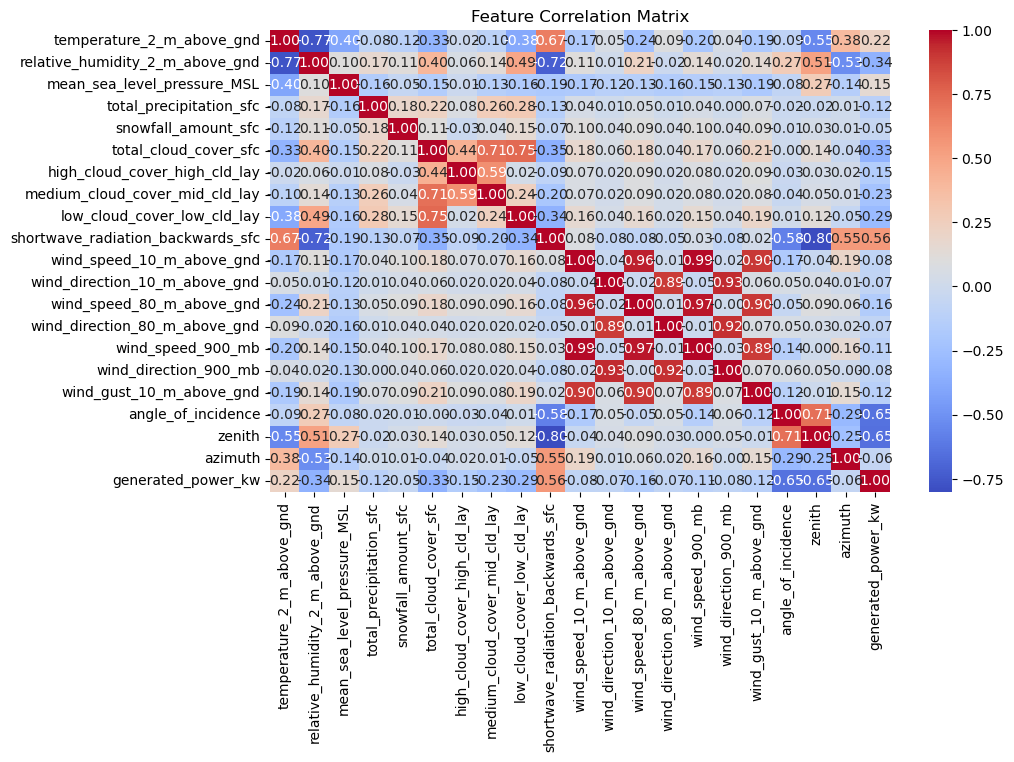

Root Mean Squared Error: 507.53
R2 Score: 0.72
Root Mean Squared Error: 530.94
R2 Score: 0.69
Root Mean Squared Error: 406.29
R2 Score: 0.82


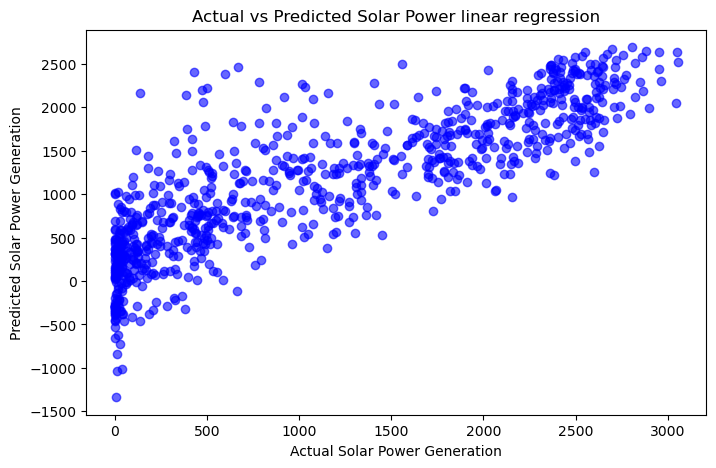

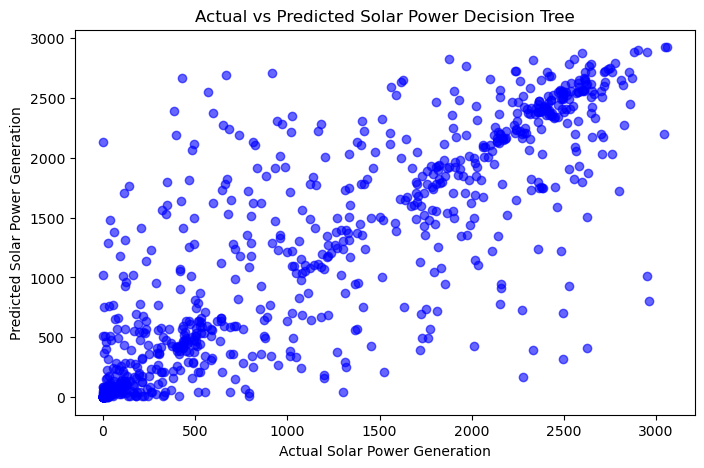

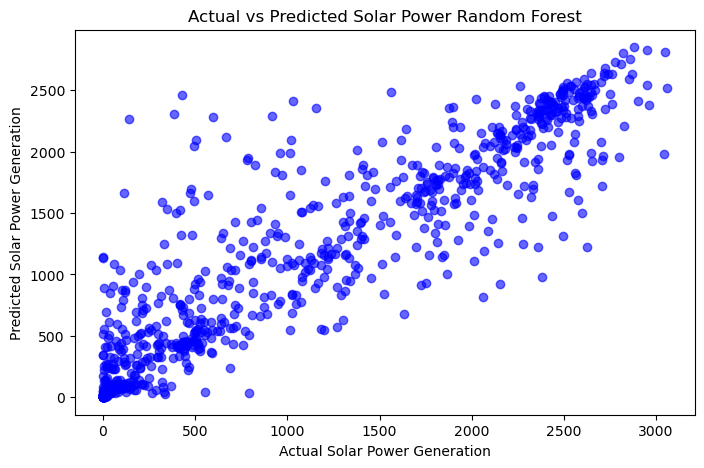

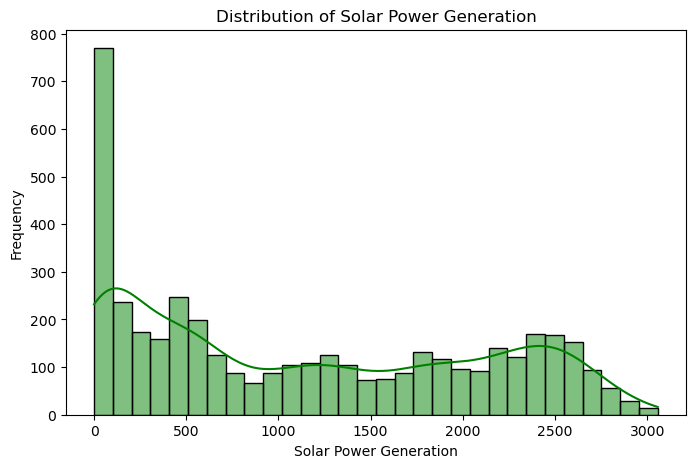

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# Load Dataset
df = pd.read_csv('solarpowergeneration.csv')

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

# Splitting features (X) and target variable (y)
X = df.iloc[:, :-1].values  # All columns except last one
y = df.iloc[:, -1].values   # Last column (solar power generation)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose a Machine Learning LR_model (Linear Regression or Decision Tree)
LR_model = LinearRegression()  
Tree_model = DecisionTreeRegressor()
RF = RandomForestRegressor()

# Train the LR_model
LR_model.fit(X_train, y_train)
Tree_model.fit(X_train, y_train)
RF.fit(X_train, y_train)

# Predictions
LinearRegression_pred = LR_model.predict(X_test)
Tree_model_pred = Tree_model.predict(X_test)
RF_pred = RF.predict(X_test)

# LR_model Evaluation
LR_rmse = np.sqrt(mean_squared_error(y_test, LinearRegression_pred))
LR_r2 = r2_score(y_test, LinearRegression_pred)
Tree_rmse = np.sqrt(mean_squared_error(y_test, Tree_model_pred))
Tree_r2 = r2_score(y_test, Tree_model_pred)
RF_rmse = np.sqrt(mean_squared_error(y_test, RF_pred))
RF_r2 = r2_score(y_test, RF_pred)

print(f'Root Mean Squared Error: {LR_rmse:.2f}')
print(f'R2 Score: {LR_r2:.2f}')
print(f'Root Mean Squared Error: {Tree_rmse:.2f}')
print(f'R2 Score: {Tree_r2:.2f}')
print(f'Root Mean Squared Error: {RF_rmse:.2f}')
print(f'R2 Score: {RF_r2:.2f}')

# Plot Predictions vs Actual Values
plt.figure(figsize=(8, 5))
plt.scatter(y_test, LinearRegression_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Solar Power Generation')
plt.ylabel('Predicted Solar Power Generation')
plt.title('Actual vs Predicted Solar Power linear regression')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, Tree_model_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Solar Power Generation')
plt.ylabel('Predicted Solar Power Generation')
plt.title('Actual vs Predicted Solar Power Decision Tree')
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(y_test, RF_pred, color='blue', alpha=0.6)
plt.xlabel('Actual Solar Power Generation')
plt.ylabel('Predicted Solar Power Generation')
plt.title('Actual vs Predicted Solar Power Random Forest')
plt.show()

# Distribution of Solar Power Generation
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='green')
plt.xlabel('Solar Power Generation')
plt.ylabel('Frequency')
plt.title('Distribution of Solar Power Generation')
plt.show()




C:\Users\bhara\AppData\Local\Temp\ipykernel_6260\2960699341.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=df.columns[:-1], palette='viridis')


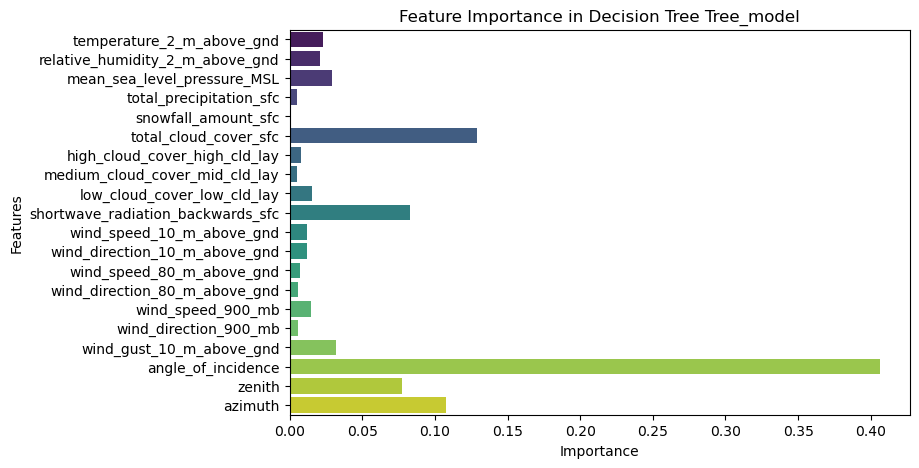

In [6]:
# Feature Importance (for Decision Tree)
if isinstance(Tree_model, DecisionTreeRegressor):
    feature_importances = Tree_model.feature_importances_
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature_importances, y=df.columns[:-1], palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance in Decision Tree Tree_model')
    plt.show()

C:\Users\bhara\AppData\Local\Temp\ipykernel_6260\2587975065.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=df.columns[:-1], palette='viridis')


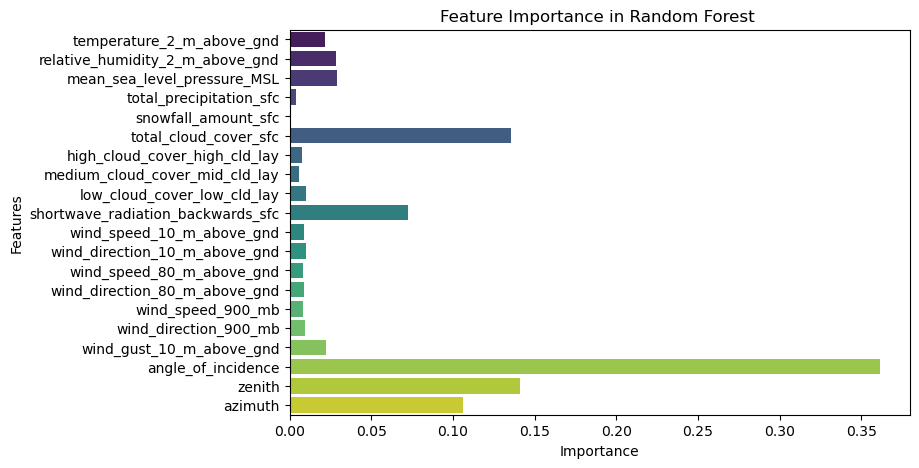

In [7]:
# Feature Importance (for Random Forest)
if isinstance(RF, RandomForestRegressor):
    feature_importances = RF.feature_importances_
    plt.figure(figsize=(8, 5))
    sns.barplot(x=feature_importances, y=df.columns[:-1], palette='viridis')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance in Random Forest ')
    plt.show()